### GRU Model Training

In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the dataset

X= np.load('C:/Users/SRIJAN SASMAL/Desktop/Infosys Springboard Intern/prognosAI-Infosys-intern-project/milestone_3/week_5/Day_21/rolling_window_sequences.npy')
meatdata= pd.read_csv('C:/Users/SRIJAN SASMAL/Desktop/Infosys Springboard Intern/prognosAI-Infosys-intern-project/milestone_3/week_5/Day_21/sequence_metadata_with_RUL.csv')
y= meatdata['RUL']
print('Features Shape: ',X.shape)
print('Target Shape: ', y.shape)

Features Shape:  (152559, 30, 66)
Target Shape:  (152559,)


In [4]:
# split into train and test
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [7]:
# Define GRU model creation function
def create_gru_model(input_shape, units=64, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(GRU(units, input_shape=input_shape))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

In [8]:
# Create the model
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]), units=64, learning_rate=0.001, dropout_rate=0.2)

# callbacks for early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 20518.5039 - mae: 114.3634 - val_loss: 12708.6875 - val_mae: 87.2312
Epoch 2/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 9973.5342 - mae: 77.3166 - val_loss: 7254.0522 - val_mae: 63.8439
Epoch 3/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 5483.0474 - mae: 54.0929 - val_loss: 4291.2300 - val_mae: 47.8051
Epoch 4/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 4064.6028 - mae: 47.1961 - val_loss: 3671.9888 - val_mae: 44.1768
Epoch 5/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 3664.4976 - mae: 45.2317 - val_loss: 3354.9683 - val_mae: 42.7850
Epoch 6/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 3459.4990 - mae: 44.1261 - val_loss: 3316.4097 - val_mae: 42.2425
Epoch 7/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 3284.9246 - mae: 43.0840 - val_loss: 3024.4370 - val_mae: 40.6015
Epoch 8/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 3150.1582 - mae: 42.1451 - val

In [10]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}')

# Predict on test set
y_pred = model.predict(X_val).flatten()

# Calculate test MSE
test_mse = mean_squared_error(y_val, y_pred)
print(f'Test MSE: {test_mse:.4f}')

Validation MSE: 1538.5702, MAE: 28.9206
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test MSE: 1538.5714


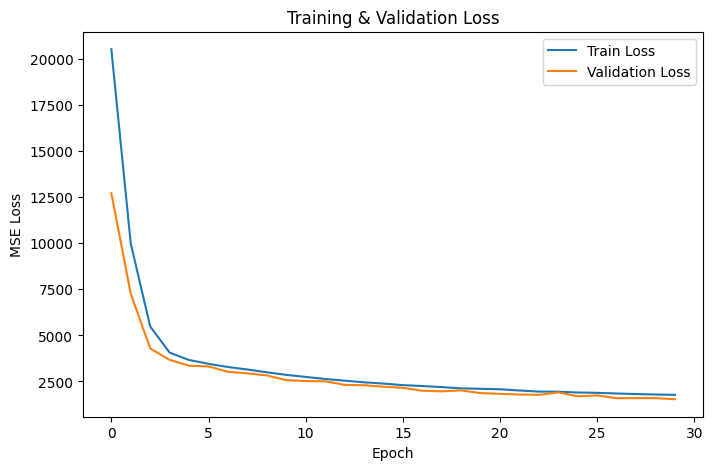

In [11]:
# Training and Validation Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()